In [1]:
import numpy as np
import csv, os
import matplotlib.pyplot as plt

In [2]:
# train = "./src/results/log_train_16_23-02-2024_10-15-39.csv"
# valid = "./rc/results/log_valid_16_23-02-2024_10-15-39"
train = "./saved_losses/all_data/results/-resnet34-RMS/log_train_16_22-05-2024_12-19-32.csv"
eval = "./saved_losses/all_data/results/-resnet34-RMS/log_valid_16_22-05-2024_12-19-32.csv"
print(os.getcwd())

c:\Users\Lisa\Documents\GitHub\handwriting-recognition\siamese_src


In [3]:
def read_eval_losses(eval_path):
    epochs = []
    losses = []
    pos_dists = []
    neg_dists = []

    with open(eval_path) as eval_f:
        reader = csv.reader(eval_f, delimiter=',')
        idx = 0
        for line in reader:
            print(line[0])
            idx += 1
            epoch, loss, pos_dist, neg_dist, _ = line[0].split(" ")
            epochs.append(epoch)
            losses.append(loss)
            pos_dists.append(pos_dist)
            neg_dists.append(neg_dist)

    return np.array(epochs, dtype=np.int16), np.array(losses, dtype=np.float32), np.array(pos_dists, dtype=np.float32), np.array(neg_dists, dtype=np.float32)

epochs, train_losses, train_pos, train_neg = read_eval_losses(train)
epochs, valid_losses, valid_pos, valid_neg = read_eval_losses(eval)
    



0 0.29666227 0.22207925 0.44094253 
1 0.13809453 0.17545673 0.487276 
2 0.12270196 0.16722685 0.50596434 
3 0.10946227 0.15916198 0.51877666 
4 0.09802619 0.15085003 0.52887434 
5 0.08933902 0.1440426 0.53078115 
6 0.08260749 0.13777258 0.5225379 
7 0.07740843 0.13052632 0.50417167 
8 0.0700556 0.12226813 0.49095738 
9 0.06427137 0.11650283 0.50146174 
10 0.05845978 0.11130331 0.51218367 
11 0.05406052 0.1071278 0.5251465 
12 0.05025711 0.1036196 0.53546876 
13 0.04632419 0.09998353 0.54771906 
14 0.04345167 0.09712526 0.5555418 
15 0.04094512 0.09495845 0.5619939 
16 0.03828758 0.09300229 0.5725577 
17 0.03678336 0.09130926 0.5765503 
18 0.0349512 0.08971059 0.58027804 
19 0.02595482 0.08053616 0.60900575 
20 0.02357773 0.07817676 0.6330707 
21 0.02211966 0.07676971 0.6441516 
22 0.02112531 0.07588345 0.6519311 
23 0.01967213 0.07405137 0.6598885 
24 0.01929456 0.07371695 0.66350275 
0 0.11702003 0.1321874 0.51691127 
1 0.09814082 0.10757238 0.42994496 
2 0.08993404 0.1029195 0.455759

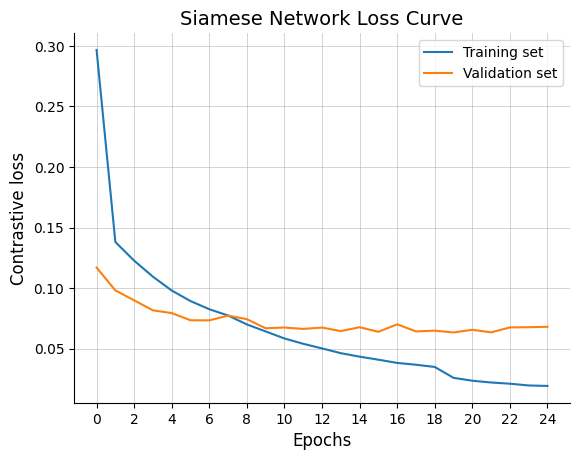

In [6]:
plt.plot(epochs, train_losses, label="Training set")
plt.plot(epochs, valid_losses, label="Validation set")
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Contrastive loss", fontsize=12)
plt.title("Siamese Network Loss Curve", fontsize=14)
plt.xticks(np.arange(0, 26, step=2))
axarr = plt.gca()
axarr.grid(linewidth=0.4)
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.legend()
plt.savefig( "./saved_losses/all_data/results/-resnet34-RMS/resnet34-losses.png", dpi=300, bbox_inches="tight")
plt.show()



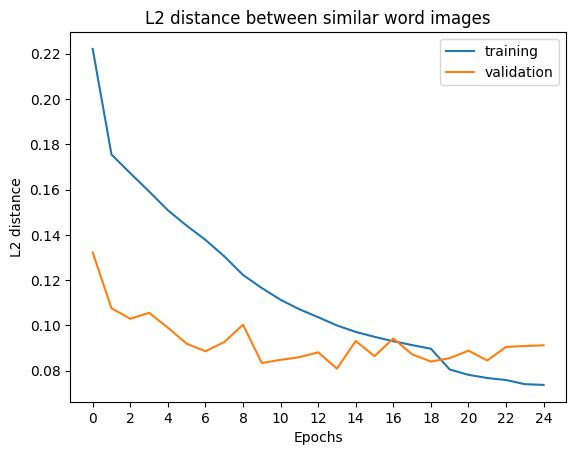

In [6]:
plt.plot(epochs, train_pos, label="training")
plt.plot(epochs, valid_pos, label="validation")
plt.xlabel("Epochs")
plt.ylabel("L2 distance")
plt.title("L2 distance between similar word images")
plt.xticks(np.arange(0, 26, step=2))
plt.legend()
plt.savefig( "./saved_losses/all_data/results/-resnet34-RMS/resnet34-pos_dist.png", dpi=300, bbox_inches="tight")
plt.show()


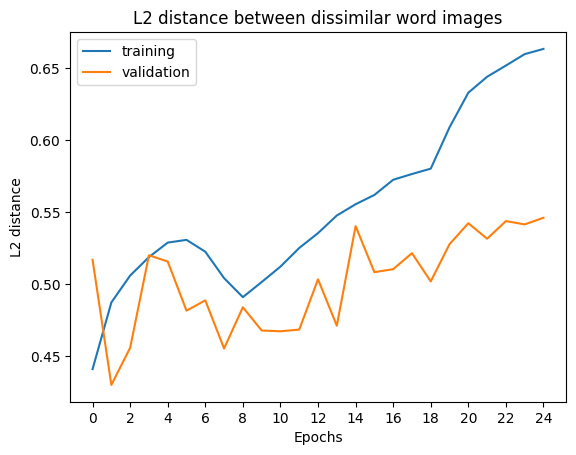

In [7]:
plt.plot(epochs, train_neg, label="training")
plt.plot(epochs, valid_neg, label="validation")
plt.xlabel("Epochs")
plt.ylabel("L2 distance")
plt.xticks(np.arange(0, 26, step=2))
plt.title("L2 distance between dissimilar word images")
plt.legend()
plt.savefig( "./saved_losses/all_data/results/-resnet34-RMS/resnet34-neg_dist.png", dpi=300, bbox_inches="tight")
plt.show()

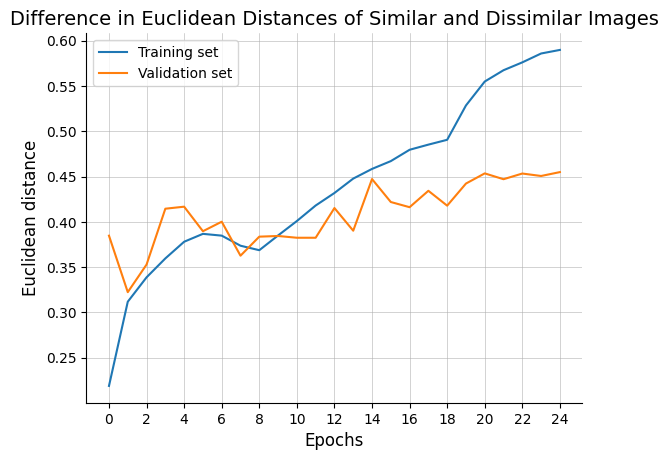

In [10]:
plt.plot(epochs, train_neg - train_pos, label="Training set")
plt.plot(epochs, valid_neg - valid_pos, label="Validation set")
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Euclidean distance", fontsize=12)
plt.title("Difference in Euclidean Distances of Similar and Dissimilar Images", fontsize=14)
axarr = plt.gca()
axarr.grid(linewidth=0.4)
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.xticks(np.arange(0, 26, step=2))
plt.legend()
plt.savefig( "./saved_losses/all_data/results/-resnet34-RMS/resnet34-diff_dist.png", dpi=300, bbox_inches="tight")
plt.show()